In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)

In [2]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
#1
non_clean_cars = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible']
non_clean_cars_info = non_clean_cars[['Make', 'Model']]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars_info)


Cars and their types that do not qualify for clean alternative fuel vehicle:
          Make    Model
6         FORD   FUSION
7         AUDI     Q5 E
8         FORD    C-MAX
11       TESLA  MODEL Y
14        FORD    C-MAX
...        ...      ...
130437     BMW     530E
130438   TESLA  MODEL Y
130439  NISSAN     LEAF
130440   TESLA  MODEL Y
130442   TESLA  MODEL 3

[69892 rows x 2 columns]


In [4]:
#2
tesla_cars_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'Bothell')]
tesla_cars_info = tesla_cars_bothell[['Model Year', 'Model', 'Electric Vehicle Type']]
print("\nTESLA cars with model year, model type, and electric vehicle type made in Bothell City:")
print(tesla_cars_info)



TESLA cars with model year, model type, and electric vehicle type made in Bothell City:
        Model Year    Model           Electric Vehicle Type
39            2020  MODEL 3  Battery Electric Vehicle (BEV)
217           2022  MODEL 3  Battery Electric Vehicle (BEV)
218           2022  MODEL Y  Battery Electric Vehicle (BEV)
222           2018  MODEL 3  Battery Electric Vehicle (BEV)
292           2017  MODEL X  Battery Electric Vehicle (BEV)
...            ...      ...                             ...
129778        2019  MODEL 3  Battery Electric Vehicle (BEV)
129954        2021  MODEL 3  Battery Electric Vehicle (BEV)
129976        2014  MODEL S  Battery Electric Vehicle (BEV)
130295        2022  MODEL 3  Battery Electric Vehicle (BEV)
130392        2018  MODEL 3  Battery Electric Vehicle (BEV)

[2407 rows x 3 columns]


In [5]:
#3
electric_cars_range_100 = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]
electric_cars_info = electric_cars_range_100[['Make', 'Model', 'Electric Range', 'Model Year']]
print("\nCars with electric range > 100 and made after 2015:")
print(electric_cars_info)



Cars with electric range > 100 and made after 2015:
          Make    Model  Electric Range  Model Year
0        TESLA  MODEL X             238        2018
2        TESLA  MODEL 3             220        2019
4        TESLA  MODEL S             210        2017
12       TESLA  MODEL 3             308        2020
13       TESLA  MODEL 3             322        2020
...        ...      ...             ...         ...
130417   TESLA  MODEL Y             291        2020
130428  NISSAN     LEAF             151        2018
130432   TESLA  MODEL Y             291        2020
130436   TESLA  MODEL 3             215        2018
130441   TESLA  MODEL X             293        2020

[34066 rows x 4 columns]


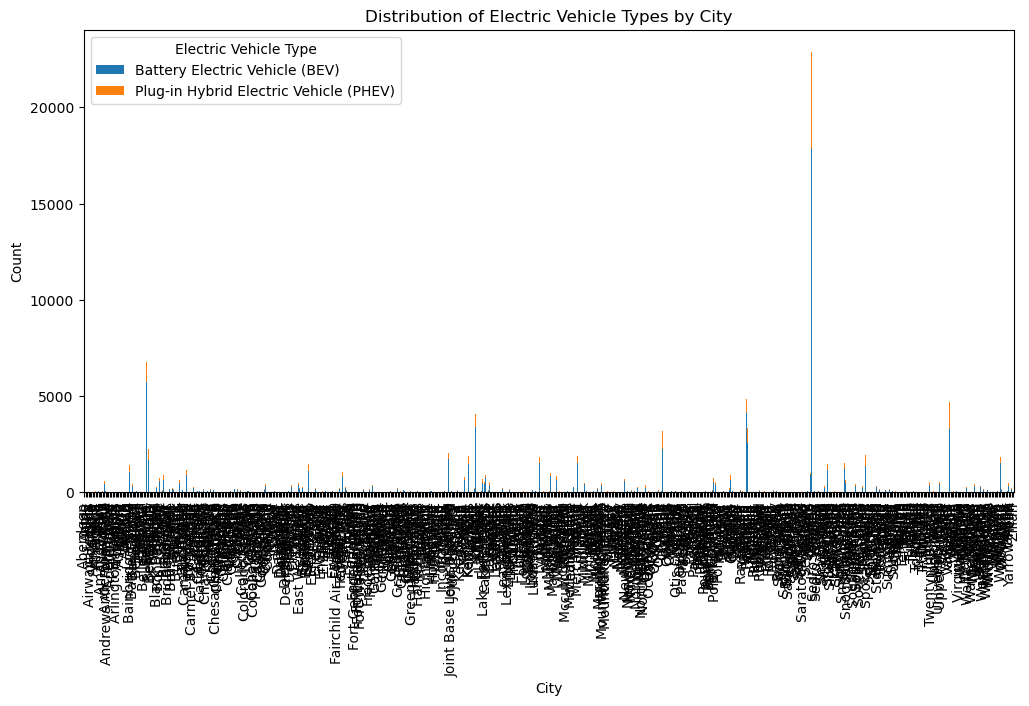

In [6]:
city_ev_counts = data.groupby(['City', 'Electric Vehicle Type']).size().unstack(fill_value=0)
city_ev_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.legend(title='Electric Vehicle Type')
plt.show()
